# 1일차 Review : 같은 문제 다시 풀어보기
---
- 학습은 10번만!

In [6]:
from sklearn.datasets import fetch_california_housing

In [7]:
cali = fetch_california_housing()

In [8]:
x = cali.data
y = cali.target

In [9]:
x.shape, y.shape

((20640, 8), (20640,))

In [11]:
cali.target_names

['MedHouseVal']

In [12]:
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [10]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [13]:
########
# 모델링
########
# 클리어
keras.backend.clear_session()
# 모델 생성
model = keras.models.Sequential()
# 모델 블록 조립
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(1))
# 컴파일
model.compile(loss='mse', optimizer='adam')

In [14]:
###########
# 모델 학습
###########
model.fit(x, y, epochs=10, verbose=1)

Epoch 1/10
645/645 [==============================] - 1s 1ms/step - loss: 132263.1250
Epoch 2/10
645/645 [==============================] - 1s 1ms/step - loss: 326.1380
Epoch 3/10
645/645 [==============================] - 1s 1ms/step - loss: 36.7988
Epoch 4/10
645/645 [==============================] - 1s 1ms/step - loss: 23.7243
Epoch 5/10
645/645 [==============================] - 1s 1ms/step - loss: 16.6376
Epoch 6/10
645/645 [==============================] - 2s 3ms/step - loss: 13.1361
Epoch 7/10
645/645 [==============================] - 1s 2ms/step - loss: 11.5243
Epoch 8/10
645/645 [==============================] - 1s 1ms/step - loss: 10.2424
Epoch 9/10
645/645 [==============================] - 1s 1ms/step - loss: 9.0522
Epoch 10/10
645/645 [==============================] - 1s 966us/step - loss: 8.0245


In [24]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [25]:
###########
# 모델 예측
###########
y_pred = model.predict(x).reshape(-1)

645/645 [==============================] - 1s 1ms/step


In [26]:
print(y_pred[:5])
print(y[:5])

[4.727 4.252 5.976 5.023 5.082]
[4.526 3.585 3.521 3.413 3.422]


In [28]:
import pandas as pd
df1 = pd.DataFrame(x, columns=cali.feature_names)
df2 = pd.DataFrame(y, columns=cali.target_names)
pd.concat([df1, df2], axis=1).head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


# 히든 레이어 추가하여 모델링!
---
- 조건
    - 히든 레이어 2개를 추가하여 다시 모델링!
    - 히든 레이어 노드 수 : 32
    - 히든 레이어 activation = 'relu'

In [38]:
x.shape, y.shape

((20640, 8), (20640,))

In [48]:
########
# 모델링
########
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [53]:
###########
# 모델 학습
###########
history =model.fit(x, y, epochs=10, verbose=1, batch_size=5)

Epoch 1/10
4128/4128 [==============================] - 7s 2ms/step - loss: 2.0062
Epoch 2/10
4128/4128 [==============================] - 7s 2ms/step - loss: 0.8295
Epoch 3/10
4128/4128 [==============================] - 6s 1ms/step - loss: 0.8068
Epoch 4/10
4128/4128 [==============================] - 7s 2ms/step - loss: 0.6924
Epoch 5/10
4128/4128 [==============================] - 6s 2ms/step - loss: 0.6540
Epoch 6/10
4128/4128 [==============================] - 7s 2ms/step - loss: 0.6149
Epoch 7/10
4128/4128 [==============================] - 6s 1ms/step - loss: 0.5878
Epoch 8/10
4128/4128 [==============================] - 6s 2ms/step - loss: 0.5929
Epoch 9/10
4128/4128 [==============================] - 6s 1ms/step - loss: 0.5369
Epoch 10/10
4128/4128 [==============================] - 7s 2ms/step - loss: 0.5353


In [54]:
###########
# 모델 예측
###########
y_pred = model.predict(x)
y_pred[:5]

645/645 [==============================] - 1s 984us/step


array([[4.139],
       [4.126],
       [3.636],
       [3.264],
       [2.500]], dtype=float32)

In [52]:
print(y[:5])

[4.526 3.585 3.521 3.413 3.422]


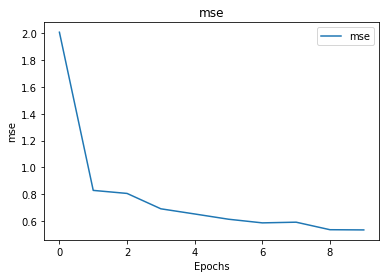

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend(['mse'])
plt.show()

In [61]:
########
# 모델링
########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

keras.backend.clear_session()
model = keras.models.Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')